# Проект по теме «Машинное обучение»

Сегодня я разберу задачу классификации для датасета Predict Pet Adoption Status Dataset. По характеристикам животного надо предсказать, заберут ли его из приюта.

## Подготовка

In [ ]:
!gdown 1ckVbIobQRQvh3V1yVGAWY6QwFicJb7ul

Downloading...
From: https://drive.google.com/uc?id=1ckVbIobQRQvh3V1yVGAWY6QwFicJb7ul
To: /content/pet_adoption_data.csv
100% 135k/135k [00:00<00:00, 15.4MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/pet_adoption_data.csv', index_col=0)

In [ ]:
df

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
PetID,,,,,,,,,,,,
500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0


Переменные в данных:

* `PetType` — тип животного (например, птица, кролик, собака).
* `Breed` — порода.
* `AgeMonths` — возраст  в месяцах.
* `Color` — цвет.
* `Size` — размер.
* `WeightKg` — вес.
* `Vaccinated` — есть ли прививка (0 — нет, 1 — да).
* `HealthCondition` — здоровое или больное животное (0 — здоровое, 1 — больное).
* `TimeInShelterDays` — количество дней в приюте.
* `AdoptionFee` — сколько стоит забрать животное из приюта.
* `PreviousOwner` — был ли у животного уже хозяин (0 — нет, 1 — да).
* `AdoptionLikelihood `— найдут ли хозяина животному (0 — низкая вероятность, 1 — высокая вероятность). Это целевая переменная.

In [ ]:
df.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [ ]:
y, X = df['AdoptionLikelihood'], df.drop('AdoptionLikelihood', axis =1)
y

,AdoptionLikelihood
PetID,
500,0
501,0
502,0
503,0
504,0
...,...
2502,1
2503,0
2504,0


In [ ]:
X

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
PetID,,,,,,,,,,,
500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0
501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0
502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0
503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1
504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1
...,...,...,...,...,...,...,...,...,...,...,...
2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1
2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0
2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0


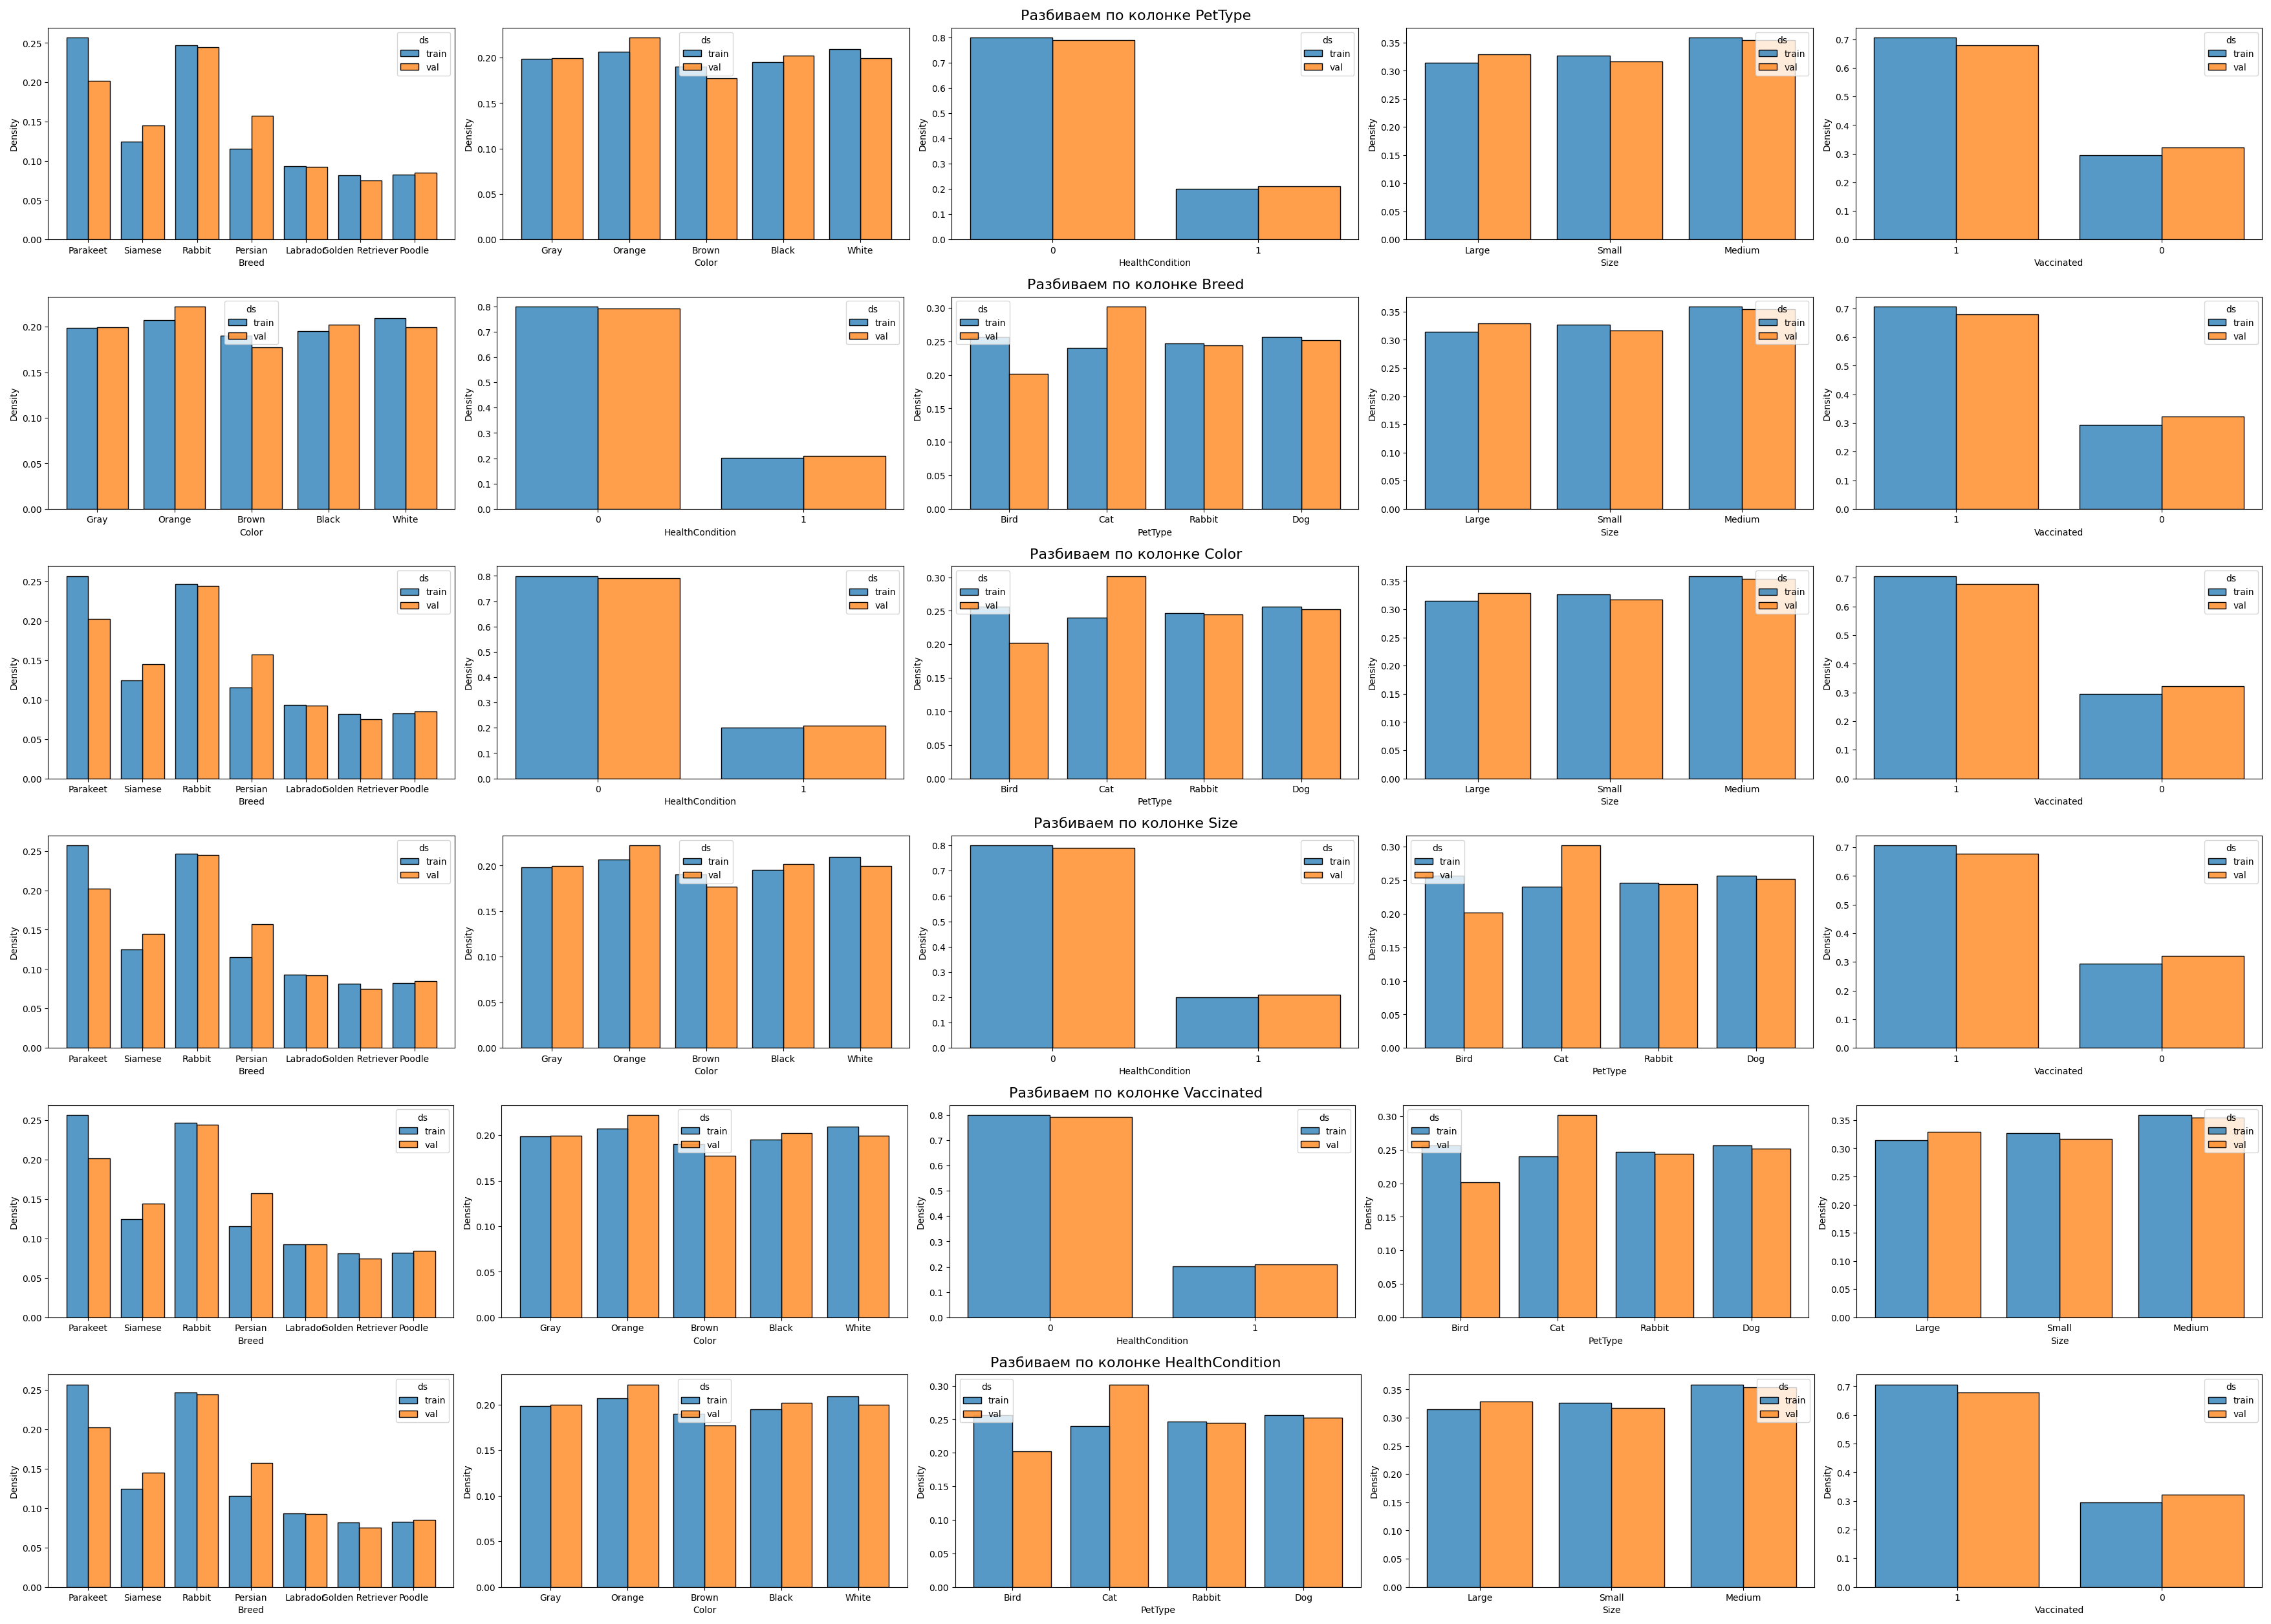

In [ ]:
# 1. Визуализация разбиений по всем категориальным переменным
cat_cols = ['PetType', 'Breed', 'Color', 'Size',
       'Vaccinated', 'HealthCondition'] # Все категориальные колонки в виде списка строк

# Тело графика
fig, axs = plt.subplots(len(cat_cols), 1, figsize=(35, 25), constrained_layout=True) # Создаём строки, в которые будем вставлять уже столбцы графиков
for ax in axs.ravel():
  ax.axis('off')

# Сетка, по которой будем вставлять картинки в каждую строку
gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for subfig, stratify_col in zip(subfigs, cat_cols):

  # Разбиваем по нашей колонке интереса на train, val и test
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.6, random_state=1345234)
  X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=0.5, random_state=1345234)

  # Для удобства визуализации собираем всё в один датасет, как было на семинаре
  X_train['ds'] = 'train'
  X_val['ds'] = 'val'
  X_train_val = pd.concat([X_train, X_val])
  X_train_val = X_train_val.astype(str) # Необходимо для корректной работы для бинарных переменных, которые в данных записаны в виде int

  # Подписываем каждую строку
  subfig.suptitle(f'Разбиваем по колонке {stratify_col}', fontsize=16)

  # Добавляем в каждую строку графики по количеству переменных, за исключением переменной, по которой разбиваем
  axs = subfig.subplots(nrows=1, ncols=len(cat_cols)-1)

  for ax, col in zip(axs, sorted(set(cat_cols) - set([stratify_col]))):
    sns.histplot(X_train_val, x=col, hue = 'ds', stat='density', common_norm=False, multiple='dodge', shrink=0.8, ax=ax)
plt.show()

Меньше всего описательные статистики отличаются в разрезе категориальных переменных Breed и HealthCondition. Возьмем разбиение по Breed.

In [ ]:
#разбиение по выбранной переменной на данных. Следи, чтобы целевая переменная не попала к объясняющим переменным
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.6, stratify=X['Breed'], random_state=1345234)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, stratify=X_val['Breed'], train_size=0.5, random_state=1345234)

## OHE-обработка категорий и выбор алгоритма для обучения

Метрика Accuracy имеет вид:

$$Acc = \frac{1}{n}∑_{i=1}^nI[y_i = \hat{y_i}]\text,  \\
\text{где n — количество наблюдений;} \\
y_i \text{ — истинная метка класса для i-го наблюдения;} \\
\hat{y_i} \text{ — предсказанная метка класса для i-го наблюдения.}$$

In [ ]:
# Примени OHE
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

ohe_train = ohe.fit_transform(X_train[cat_cols])
ohe_val = ohe.transform(X_val[cat_cols])
ohe_test = ohe.transform(X_test[cat_cols])

train_ohe_df = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_cols), index=X_train.index)
val_ohe_df = pd.DataFrame(ohe_val, columns=ohe.get_feature_names_out(cat_cols), index=X_val.index)
test_ohe_df = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_cols), index=X_test.index)

X_train = X_train.drop(columns=cat_cols).join(train_ohe_df)
X_val = X_val.drop(columns=cat_cols).join(val_ohe_df)
X_test = X_test.drop(columns=cat_cols).join(test_ohe_df)




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

models = {
    'Логистическая регрессия': LogisticRegression(n_jobs=-1, random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)


    train_acc = accuracy_score(y_train, train_pred) * 100
    val_acc = accuracy_score(y_val, val_pred) * 100
    print(f'Accuracy на train для {name} = {train_acc}%')
    print(f'Accuracy на val для {name} = {val_acc}%')

Accuracy на train для Логистическая регрессия = 90.61461794019934%
Accuracy на val для Логистическая регрессия = 90.27431421446383%
Accuracy на train для SVM = 66.94352159468438%
Accuracy на val для SVM = 67.33167082294264%
Accuracy на train для KNN = 76.32890365448505%
Accuracy на val для KNN = 67.83042394014963%


## Подбор параметров для модели и проверка результатов на test [3 балла]


In [ ]:
# Выбираем параметры и выбираем лучшие
# Будем сохранять лучшие резульаты
best_val = 0
best_params = {}

for j in [0.01, 1, 10, 100]:
  for i in range(1, 100):
    model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=j, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',
                               max_iter=i, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    acc_train = accuracy_score(y_train, train_preds) * 100
    acc_val = accuracy_score(y_val, val_preds) * 100

    if best_val < acc_val:
        best_val = acc_val
        best_train = acc_train
        best_model = model
        best_params = {'C': j, 'max_iter': i}

print(f'На обучающей выборке лучшее значение Acc = {best_train}%')
print(f'На валидационной выборке лучшее значение Acc = {best_val}%')
print(f'Лучшие параметры: {best_params}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

На обучающей выборке лучшее значение Acc = 90.19933554817275%
На валидационной выборке лучшее значение Acc = 90.52369077306733%
Лучшие параметры: {'C': 1, 'max_iter': 79}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print(f'На обучающей выборке лучшее значение Acc = {best_train}%')
print(f'На валидационной выборке лучшее значение Acc = {best_val}%')
print(f'Лучшие параметры: {best_params}')

На обучающей выборке лучшее значение Acc = 90.19933554817275%
На валидационной выборке лучшее значение Acc = 90.52369077306733%
Лучшие параметры: {'C': 1, 'max_iter': 79}


In [ ]:
test_preds = best_model.predict(X_test)
acc_test = accuracy_score(y_test, test_preds) * 100
print(f'На тестовой выборке лучшее значение Acc = {acc_test}%')

На тестовой выборке лучшее значение Acc = 93.78109452736318%


Было :
Accuracy на train для Логистическая регрессия = 90.61461794019934%

Accuracy на val для Логистическая регрессия = 90.27431421446383%

Стало:
На обучающей выборке лучшее значение Acc = 90.19933554817275%

На валидационной выборке лучшее значение Acc = 90.52369077306733%
Лучшие параметры: {'C': 1, 'max_iter': 79}

На тестовой выборке лучшее значение Acc = 93.78109452736318%

Неплохо

## Нормализация данных


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_val[num_cols] = sc.transform(X_val[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

In [ ]:
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, C=1.0, random_state=42)
model.fit(X_train, y_train)

train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

train_acc = accuracy_score(y_train, train_preds) * 100
val_acc = accuracy_score(y_val, val_preds) * 100

print(f'Accuracy на train для Логистической регрессии = {train_acc}%')
print(f'Accuracy на val для Логистической регрессии = {val_acc}%')

Accuracy на train для Логистической регрессии = 90.69767441860465%
Accuracy на val для Логистической регрессии = 90.27431421446383%


было:
На обучающей выборке лучшее значение Acc = 90.19933554817275%

На валидационной выборке лучшее значение Acc = 90.52369077306733%


Стало:

Accuracy на train для Логистической регрессии = 90.69767441860465%

Accuracy на val для Логистической регрессии = 90.27431421446383%

Стало хуже чуть-чуть

In [ ]:
best_val = 0
best_params = {}

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    acc_train = accuracy_score(y_train, train_preds) * 100
    acc_val = accuracy_score(y_val, val_preds) * 100

    if acc_val > best_val:
        best_val = acc_val
        best_train = acc_train
        best_model = model
        best_params = {'C': C}

print(f'Лучший параметр C: {best_params["C"]}')
print(f'На обучающей выборке лучшее значение Acc = {best_train}%')
print(f'На валидационной выборке лучшее значение Acc = {best_val}%')

Лучший параметр C: 1
На обучающей выборке лучшее значение Acc = 90.69767441860465%
На валидационной выборке лучшее значение Acc = 90.27431421446383%


У меня был C = 1. это лучший параметр.

In [ ]:
test_preds = best_model.predict(X_test)
acc_test = accuracy_score(y_test, test_preds) * 100
print(f'На тестовой выборке лучшее значение Acc = {acc_test}%')

На тестовой выборке лучшее значение Acc = 94.02985074626866%


94% Это неплохо. Я бы сказал, что я научился предсказывать, заберут ли бедную животинку из приюта с вероятностью 94%. После нормализации данных результат улучшился.